[0, 1, 2, 3, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 10, 11, 12, 13, 12, 11, 10, 11, 12, 11, 10, 11, 10, 11, 12, 11, 12, 11, 12, 11, 10, 9, 10, 11, 10, 9, 8, 7, 6, 5, 4, 5, 4, 3, 4, 5, 4, 3, 2, 1, 2, 1, 0, 1, 2, 1, 0, -1, 0, -1, -2, -1, 0, 1, 2, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 0, -1, 0, -1, 0, 1, 2, 3, 4, 3, 2, 3, 4, 5, 4, 3, 2, 1, 0]


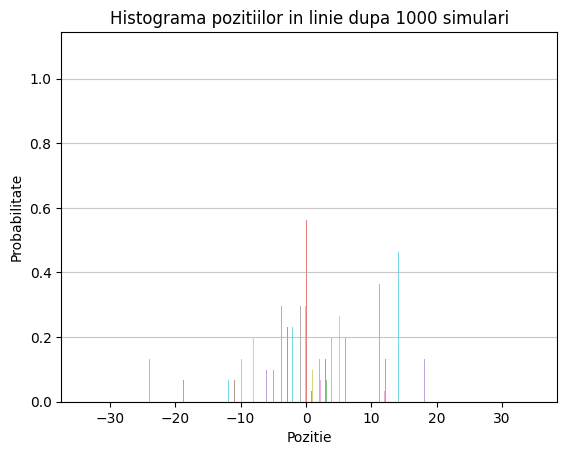

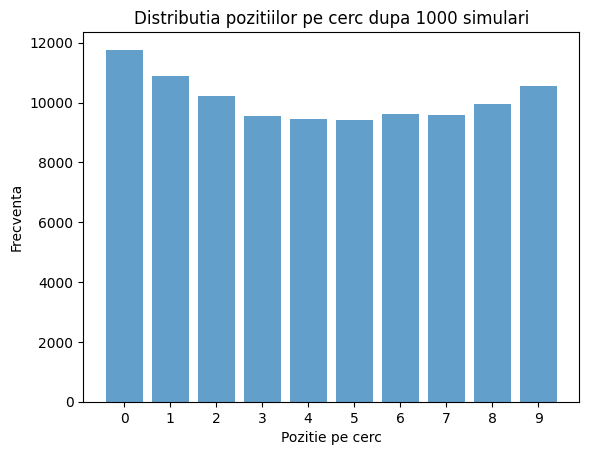

In [61]:
from scipy.stats import bernoulli, binom
from matplotlib.pyplot import bar, show, hist, grid, legend, xticks, xlabel, ylabel, title

import numpy as np


def simulare_liniara(no_steps: int, prob: float):
    positions = [0]
    for _ in range(no_steps):
        forward = bernoulli.rvs(prob)
        if forward:
            positions.append(positions[-1] + 1)
        else:
            positions.append(positions[-1] - 1)
    return positions


def simulare_multiplab(no_sim: int, no_steps: int, prob: float):
    sim_positions = []
    for _ in range(no_sim):
        positions = simulare_liniara(no_steps, prob)
        sim_positions.append(positions)

    # histograma
    hist(sim_positions, bins='auto', alpha=0.6, rwidth=0.9, density=True)
    grid(axis='y', alpha=0.7)
    xlabel('Pozitie')
    ylabel('Probabilitate')
    title('Histograma pozitiilor in linie dupa ' + str(no_sim) + ' simulari')
    show()


def simulare_cerc(no_steps: int, no_nodes: int, prob: float):
    positions = [0]
    for _ in range(no_steps):
        forward = bernoulli.rvs(prob)
        if forward:
            positions.append((positions[-1] + 1) % no_nodes)
        else:
            positions.append((positions[-1] - 1) % no_nodes)
    return positions


def simulare_multiplac(no_sim: int, no_steps: int, no_nodes: int, prob: float):
    sim_positions = []
    for _ in range(no_sim):
        positions = simulare_cerc(no_steps, no_nodes, prob)
        sim_positions.append(positions)

    # histograma
    unique_pos, counts = np.unique(sim_positions, return_counts=True)
    bar(unique_pos, counts, alpha=0.7)
    xlabel('Pozitie pe cerc')
    ylabel('Frecventa')
    title('Distributia pozitiilor pe cerc dupa ' + str(no_sim) + ' simulari')
    xticks(unique_pos)
    show()


no_steps = 100
prob = 0.5

print(simulare_liniara(no_steps, prob))

no_sim = 1000
simulare_multiplab(no_sim, no_steps, prob)

no_nodes = 10
simulare_multiplac(no_sim, no_steps, no_nodes, prob)

In [60]:
from scipy.stats import hypergeom, geom

class Lotto:
    def __init__(self, bile_totale, bile_selectate, minim_bile_castigatoare):
        self.bile_totale = bile_totale
        self.bile_selectate = bile_selectate
        self.minim_bile_castigatoare = minim_bile_castigatoare

    def simulare_castig(self):
        m = 1000

        p = sum(hypergeom.pmf(np.arange(3, 7), 49, 6, 6))
    
        x = geom.rvs(p, size=m)
    
        #lista pentru numărul de bilete necâștigătoare
        numar_bilete_necastigatoare = []
    
        for i in range(m):
            # Generează bilete necâștigătoare până la primul bilet câștigător
            bilete_necastigatoare = geom.rvs(p, size=1)
            numar_bilete_necastigatoare.append(bilete_necastigatoare[0])
        numar_bilete_necastigatoare = np.array(numar_bilete_necastigatoare)
    
        print("Lista numărului de bilete necâștigătoare până la primul bilet câștigător:")
        print(numar_bilete_necastigatoare)
    
        prob_estim = np.mean(x >= 10)
    
        prob_teor = 1 - sum(geom.pmf(np.arange(0, 10), p))
    
        print("Probabilitatea estimată:", prob_estim)
        print("Probabilitatea teoretică:", prob_teor)

lotto = Lotto(49, 6, 3)

# numar de bilete succesive pierdute
lotto.simulare_castig(no_sim)

Lista numărului de bilete necâștigătoare până la primul bilet câștigător:
[ 41   1 106  76   3  97  44  21  11  22 123   6  65  57  39  33  92 229
  59 252 131   8   5  72  24  70  57  27 137  26  80  13 107 102   6   6
   8 151  57  18 107   1  20  15  80   8  34  85  28  26  44  32  26   5
 183   2 117  89  49  50  21  93   7  18   9 142  88   4  17  72  39  11
  23  10  87  29  60  20 107  49 206  79 125 129  17  20  50  42  18   2
  16 134  53  21  53  63  33 132  39  54  76  12  40  33  56  88  29   2
   2   9 161  99  48   4 178  25  32  20  10 126  40  45  62  20  41 102
  30  53  46  25   3 365  97  34  32  37   1  14  18  57 135  78  40  38
  37  24  53   1 147  10  56   7  48  48  49  84  39  64 142  43  23  10
 253   8   7  11  59  75   5  42  39 108 281  35   1  20  18  25 113  91
 221  11  69  29  35  25  10  92 175  25  52   7 226 159   1  22  30 130
  45  32   2  43  23 129   2  49  47  28  60  58  10  57   8  50 137 153
  42 155  14  52  88  26  80   3  17  66  92  14  